In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
df_galpha = pd.read_csv('GIANA_Alpha.csv')
df_gbeta = pd.read_csv('GIANA_Beta.csv')
df_gboth = pd.read_csv('GIANA_both.csv')
df_talpha = pd.read_csv('TcrDist_Alpha.csv')
df_tbeta = pd.read_csv('TcrDist_Beta.csv')
df_tboth = pd.read_csv('TcrDist_both.csv')

In [3]:
df_galpha['Encoded/Chain'] = 'Alpha - GIANA'
df_gbeta['Encoded/Chain'] = 'Beta - GIANA'
df_gboth['Encoded/Chain'] = 'Both - GIANA'
df_talpha['Encoded/Chain'] = 'Alpha - tcrDist'
df_tbeta['Encoded/Chain'] = 'Beta - tcrDist'
df_tboth['Encoded/Chain'] = 'Both - tcrDist'

In [4]:
df_tlist = [df_talpha,df_tbeta,df_tboth]
for df in df_tlist:
    df.rename(columns = {'epitope' : 'antigen.epitope'}, inplace = True)

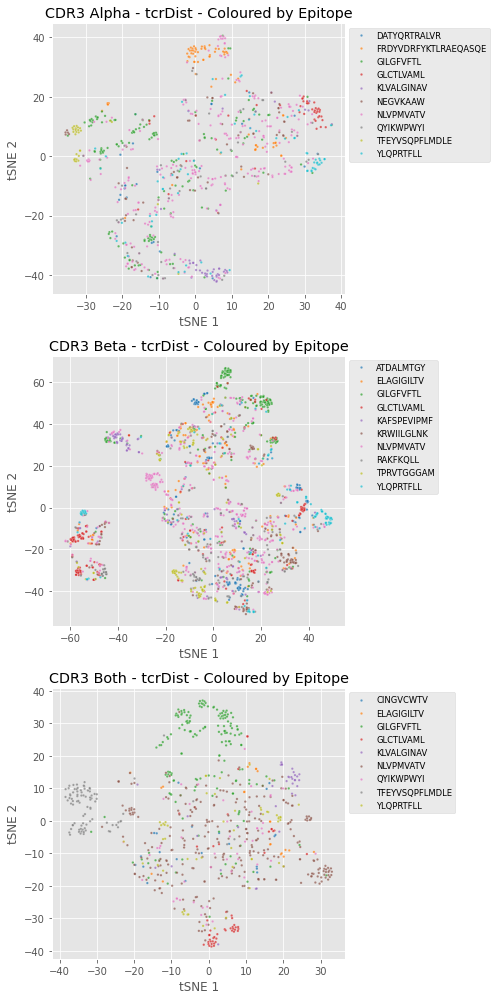

In [10]:
df_list = [df_talpha, df_tbeta, df_tboth]

# Create a subplots grid
fig, axes = plt.subplots(3, 1, figsize=(7, 14))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over DataFrames and axes
for i, (df, ax) in enumerate(zip(df_list, axes)):
    sns.scatterplot(data=df, x='tsne_1', y='tsne_2', s=6, alpha=0.7, hue='antigen.epitope', palette='tab10', ax=ax)
    
    ax.set_title(f"CDR3 {df['Encoded/Chain'].unique()[0]} - Coloured by Epitope")
    ax.set_xlabel('tSNE 1')
    ax.set_ylabel('tSNE 2')
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=1, fontsize = 'small')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()
fig.savefig('embeddings_comb11.png', dpi =1000, facecolor = 'white', bbox_inches = 'tight')